In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Firstly we define features' names

In [131]:
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [132]:
df = pd.read_csv("tweets.csv", encoding = "ISO-8859-1", names = columns)

In [133]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


If a target is 0, the tweet is negative, 2 is neutral and 4 is positive

In [134]:
length = len(df)
print(f'The length of dataset is {length}')

The length of dataset is 1600000


In [135]:
df.shape

(1600000, 6)

The dataset consists of 1 600 000 rows and 6 columns

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


We see that there are no null(missing) values (NaN)

In [137]:
df.isnull().any()

target    False
ids       False
date      False
flag      False
user      False
text      False
dtype: bool

In [138]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [139]:
df['target'].unique()

array([0, 4], dtype=int64)

The tweets are either negative (0) or positive (4)

In [140]:
df.groupby('target').count()

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


We see that there is an equal number of positive and negative tweets

# Data Visualization

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

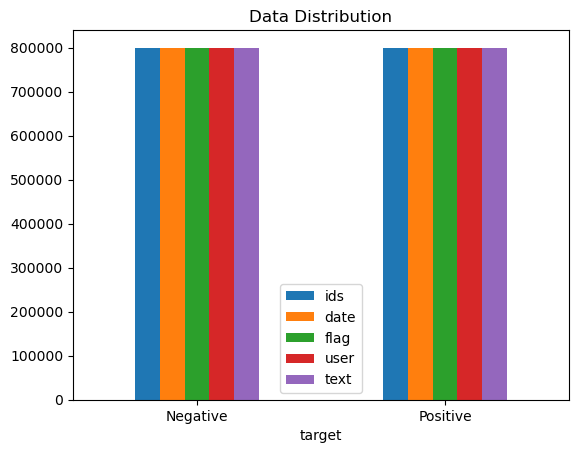

In [141]:
ax = df.groupby('target').count().plot(kind = 'bar', title = 'Data Distribution', legend = True)
ax.set_xticklabels(['Negative', 'Positive'], rotation = 0)

<AxesSubplot:xlabel='target', ylabel='count'>

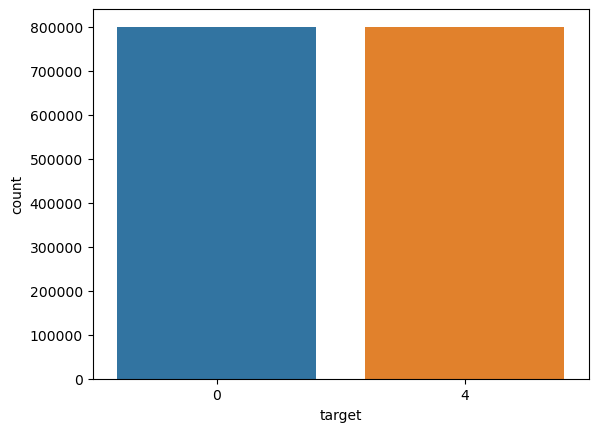

In [142]:
sns.countplot(x = 'target', data = df)

# Data Preprocessing

In [143]:
data = df[['text', 'target']]

Separating positive and negative tweets:

In [144]:
data_pos = data[data['target'] == 4]
data_neg = data[data['target'] == 0]

Now we are going to take a smaller part (one fourth) of the dataset so it can be ran faster:

In [145]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [146]:
dataset = pd.concat([data_pos, data_neg])

Converting letters to lowercase:

In [147]:
dataset['text'] = dataset['text'].str.lower()

In [148]:
dataset.head()

,text,target
800000,i love @health4uandpets u guys r the best!!,4
800001,im meeting up with one of my besties tonight! ...,4
800002,"@darealsunisakim thanks for the twitter add, s...",4
800003,being sick can be really cheap when it hurts t...,4
800004,@lovesbrooklyn2 he has that effect on everyone,4


Importing the stopwords:

In [149]:
import nltk

In [150]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\38762\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [151]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'did', 'before', "she's", 'he', "didn't", 'hadn', 'such', 'will', 'here', 'down', 'above', 'now', "doesn't", 'until', 'there', 'm', 'against', "hadn't", 'myself', 'but', 'while', 'isn', "hasn't", 'any', "needn't", 'same', 'own', 'only', 'off', 'shouldn', 'you', 're', 'i', 'their', "wouldn't", 'in', 'was', 'who', "mustn't", 'which', "mightn't", 'yourselves', 'that', 'himself', "you're", "you'd", 'again', 'y', 'her', 'then', "don't", 'themselves', 'the', 'a', 'each', 'aren', 'didn', 'been', 'more', 'herself', 'doing', 'very', 'are', 'this', 'weren', "won't", 'me', "should've", 'if', "couldn't", 'over', 'itself', "haven't", 'up', 'haven', 'once', 'of', 'hers', 'into', 'were', "you'll", 'from', 'had', 'during', 'few', 'both', 'she', 'because', 'having', 'after', 'too', 'is', 'o', 'have', 'an', 'ours', 'other', 'through', 't', 'd', 'yours', 'so', 'theirs', 'where', 'most', "shouldn't", 'as', 'does', "you've", 'hasn', 'wouldn', 'them', 'by', 'than', 'we', 'why', 'being', 'at', 'ourselves', 

Cleaning and removing the above stopwords from text:

In [152]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stops])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

Cleaning and removing punctuations:

In [153]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

Cleaning and removing repeating characters:

In [154]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

Cleaning and removing URLs:

In [155]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

Cleaning and removing numbers:

In [156]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head()

800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
Name: text, dtype: object

Tokenization of the text:

In [157]:
from nltk.tokenize import word_tokenize
dataset['text'] = dataset['text'].apply(word_tokenize)
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

Stemming of the text:

In [158]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

Lemmatization of the text:

In [162]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\38762\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\38762\AppData\Roaming\nltk_data...


True

In [163]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [167]:
X = data.text
y = data.target

Splitting our data into train and test subsets:

In [166]:
# Separating the 80% data for training data and 20% for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

C:\Users\38762\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [172]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# Model Evaluation

In [174]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Model Building

First model we are going to use is Gaussian Naive Bayes Classifier:

In [181]:
from sklearn.naive_bayes import GaussianNB
GNBmodel = GaussianNB()
GNBmodel.fit(X_train.todense(), y_train)
model_Evaluate(GNBmodel)
y_pred1 = GNBmodel.predict(X_test)

MemoryError: Unable to allocate 4.66 TiB for an array with shape (1280000, 500000) and data type float64